In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import math

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
import string

def isNaN(num):
    return num != num

def cabin1(text):
  d = dict(zip(string.ascii_lowercase, range(1,27)))

  if isNaN(text):
    return 1.0
  else:
    one = text[0]
    one = one.lower()
    return float(d[one])
def cabin2(text):
  if isNaN(text):
    return 0.0
  else:
    return text[2:-2]

def cabin3(text):
  if isNaN(text):
    return 0.0
  else:
    if text[0] =='P':
      return 1.0
    else:
      return 0.0

In [ ]:
Y = data['Transported']
x_train = data.drop(['PassengerId','Cabin','Name','Transported'], axis =1)
x_train.insert(1, 'First_letter_cabin', [cabin1(x) for x in data['Cabin']])
x_train.insert(2, 'MIddle_number_cabin', [cabin2(x) for x in data['Cabin']])
x_train.insert(3, 'Last_letter_cabin', [cabin3(x) for x in data['Cabin']])



x_train.insert(1, 'Earth', [1.0 if i == 'Earth' else 0.0 for i in x_train['HomePlanet'] ])
x_train.insert(2, 'Europa', [1.0 if i == 'Europa' else 0.0 for i in x_train['HomePlanet'] ])
x_train.insert(3, 'Mars', [1.0 if i == 'Europa' else 0.0 for i in x_train['HomePlanet'] ])


x_train.insert(1, 'TRAPPIST-1e', [1.0 if i == 'TRAPPIST-1e' else 0.0 for i in x_train['Destination'] ])
x_train.insert(2, 'PSO J318.5-22', [1.0 if i ==  'PSO J318.5-22' else 0.0 for i in x_train['Destination'] ])
x_train.insert(3, '55 Cancri e', [1.0 if i == '55 Cancri e' else 0.0 for i in x_train['Destination'] ])


x_train = x_train.drop(['HomePlanet','Destination'], axis =1)
for i in range(8693):
  if math.isnan(x_train['CryoSleep'][i]):
    x_train['CryoSleep'][i] = False
  if math.isnan(x_train['Age'][i]):
    x_train['Age'][i] = 40.0
  if math.isnan(x_train['VIP'][i]):
    x_train['VIP'][i] = False
  if math.isnan(x_train['RoomService'][i]):
    x_train['RoomService'][i] = 0.0
  if math.isnan(x_train['FoodCourt'][i]):
    x_train['FoodCourt'][i] = 0.0
  if math.isnan(x_train['ShoppingMall'][i]):
    x_train['ShoppingMall'][i] = 0.0
  if math.isnan(x_train['Spa'][i]):
    x_train['Spa'][i] = 0.0
  if math.isnan(x_train['VRDeck'][i]):
    x_train['VRDeck'][i] = 0.0

print(x_train.columns)

<ipython-input-109-e1de65e1b5ea>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['VRDeck'][i] = 0.0
<ipython-input-109-e1de65e1b5ea>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['ShoppingMall'][i] = 0.0
<ipython-input-109-e1de65e1b5ea>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['RoomService'][i] = 0.0
<ipython-input-109-e1de65e1b5ea>:26: SettingWithCopyWarning: 
A value is trying to be set on a cop

Index(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', 'Earth', 'Europa',
       'Mars', 'First_letter_cabin', 'MIddle_number_cabin',
       'Last_letter_cabin', 'CryoSleep', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')


In [ ]:
cabins = pd.DataFrame()
cabins.insert(0, 'First_letter_cabin', [cabin1(x) for x in data['Cabin']])
cabins.insert(1, 'MIddle_number_cabin', [cabin2(x) for x in data['Cabin']])
cabins.insert(2, 'Last_letter_cabin', [cabin3(x) for x in data['Cabin']])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cabins, Y, test_size=0.2, random_state=42)

In [ ]:
print(x_train['VRDeck'][7] == None)
for i in x_train.columns:
  print(x_train[i].count())
  


False
8693
8693
8693
8693
8693
8693
8693
8693
8693
8693
8693
8693
8693
8693
8693
8693
8693


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_train, Y, test_size=0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier(n_estimators = 100,criterion = 'gini',max_depth=4, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [ ]:
clf.score(X_test, y_test)


0.6060954571592869

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

my_pipeline = make_pipeline(RandomForestClassifier(n_estimators=100))
cv_scores = cross_val_score(my_pipeline, x_train, Y, 
                            cv=7,
                            scoring='accuracy')

print("Cross-validation accuracy: %f" % cv_scores.mean())

Cross-validation accuracy: 0.775107


Index(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', 'Earth', 'Europa',
       'Mars', 'First_letter_cabin', 'MIddle_number_cabin',
       'Last_letter_cabin', 'CryoSleep', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')
0.7688326624496837


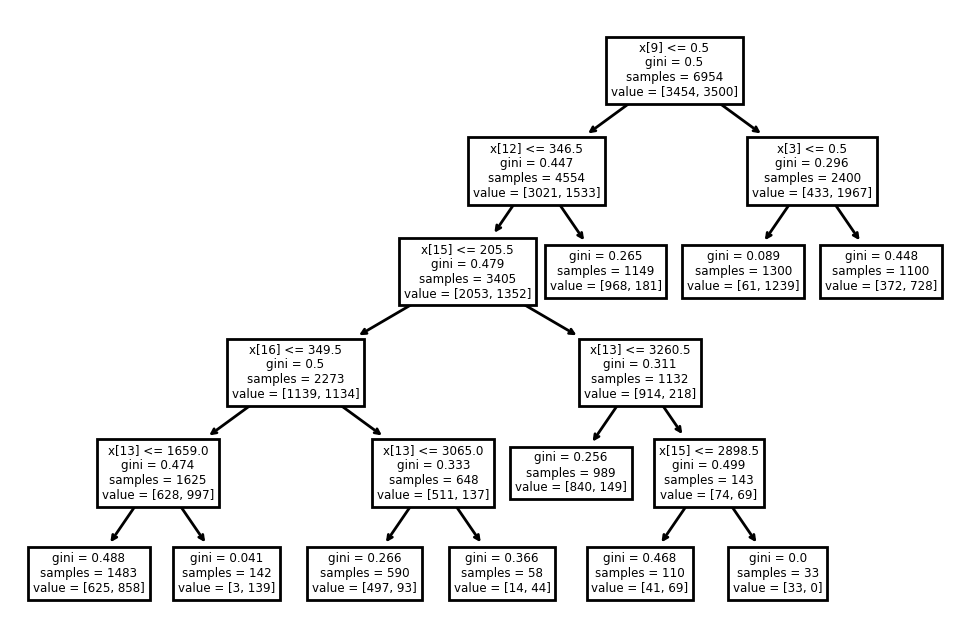

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib
print(X_train.columns)
matplotlib.rcParams["figure.dpi"] = 200
tree1 = DecisionTreeClassifier(max_depth = 10,max_leaf_nodes=10,random_state=44)
tree1.fit(X_train, y_train)
print(tree1.score(X_test, y_test))
tree.plot_tree(tree1)
plt.show()

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, add, Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
EarlyStop = EarlyStopping(monitor='val_loss', 
                          patience=3,
                          verbose=1)

model = Sequential()
model.add(tf.keras.Input(shape=(14,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.add(Dropout(0.25))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
 
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                480       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:

X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

history = model.fit(X_train, 
                    y_train, 
                    epochs=100,
                    verbose=1,
                    validation_data = (X_test, y_test),
                    callbacks = [EarlyStop],
                    batch_size = 16
                   )

Epoch 1/100
435/435 [==============================] - 3s 4ms/step - loss: 0.6638 - accuracy: 0.6586 - val_loss: 0.6259 - val_accuracy: 0.7315
Epoch 2/100
435/435 [==============================] - 2s 5ms/step - loss: 0.6348 - accuracy: 0.6752 - val_loss: 0.6244 - val_accuracy: 0.7349
Epoch 3/100
435/435 [==============================] - 1s 3ms/step - loss: 0.6359 - accuracy: 0.6671 - val_loss: 0.6226 - val_accuracy: 0.7113
Epoch 4/100
435/435 [==============================] - 1s 3ms/step - loss: 0.6311 - accuracy: 0.6700 - val_loss: 0.6209 - val_accuracy: 0.7142
Epoch 5/100
435/435 [==============================] - 1s 3ms/step - loss: 0.6288 - accuracy: 0.6772 - val_loss: 0.6212 - val_accuracy: 0.7050
Epoch 6/100
435/435 [==============================] - 1s 3ms/step - loss: 0.6299 - accuracy: 0.6744 - val_loss: 0.6190 - val_accuracy: 0.7223
Epoch 7/100
435/435 [==============================] - 1s 2ms/step - loss: 0.6282 - accuracy: 0.6682 - val_loss: 0.6179 - val_accuracy: 0.7062